**Muhammad Akram Dhaifullah<br>202010370311184<br>Temu Kembali Citra 7C**

1. Import library opencv, pyplot, numpy, dan scikit-image

In [14]:
# Tulis kode Anda disini
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
env_path = '/content/drive/MyDrive/Colab Notebooks/img-retrieval/'

In [17]:
import os

In [18]:
images = os.path.join(env_path, 'images')
images += '/'

In [19]:
files = os.listdir(images)
files

['img-dark.jpg',
 'img-noise.jpg',
 'img-lewis.jpg',
 'img-page.jpg',
 'img-nuke.jpg',
 'img-scribbled.png',
 'img-overpass.jpg',
 'f1-grid.jpg',
 'lewis-max.jpg',
 'redbull-meme.jpg']

2. Upload sebuah citra berwarna! Ubah color space dari image tersebut menjadi RGB, HSV, Lab, dan Grayscale! Tampilkan keempat citra tersebut secara berdampingan!

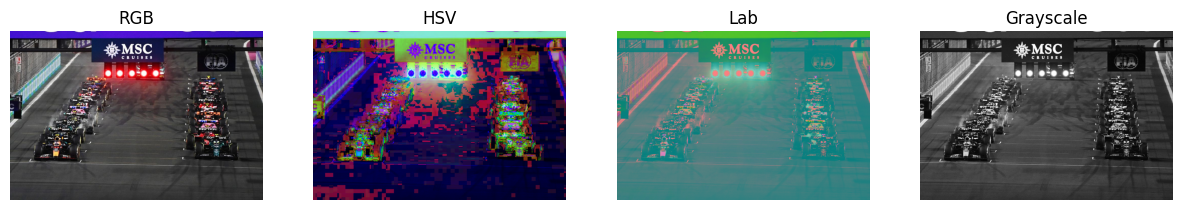

In [20]:
# Tulis kode Anda disini
# Membaca gambar asli
image = cv2.imread(images+files[files.index('f1-grid.jpg')])

# Ubah gambar ke berbagai color spaces
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tampilkan keempat citra secara berdampingan
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
axes[0].imshow(image_rgb)
axes[0].set_title('RGB')
axes[0].axis('off')
axes[1].imshow(image_hsv)
axes[1].set_title('HSV')
axes[1].axis('off')
axes[2].imshow(image_lab)
axes[2].set_title('Lab')
axes[2].axis('off')
axes[3].imshow(image_gray, cmap='gray')
axes[3].set_title('Grayscale')
axes[3].axis('off')
plt.show()


3. Tampilkan color histogram dari citra RGB yang telah diupload sebelumnya!

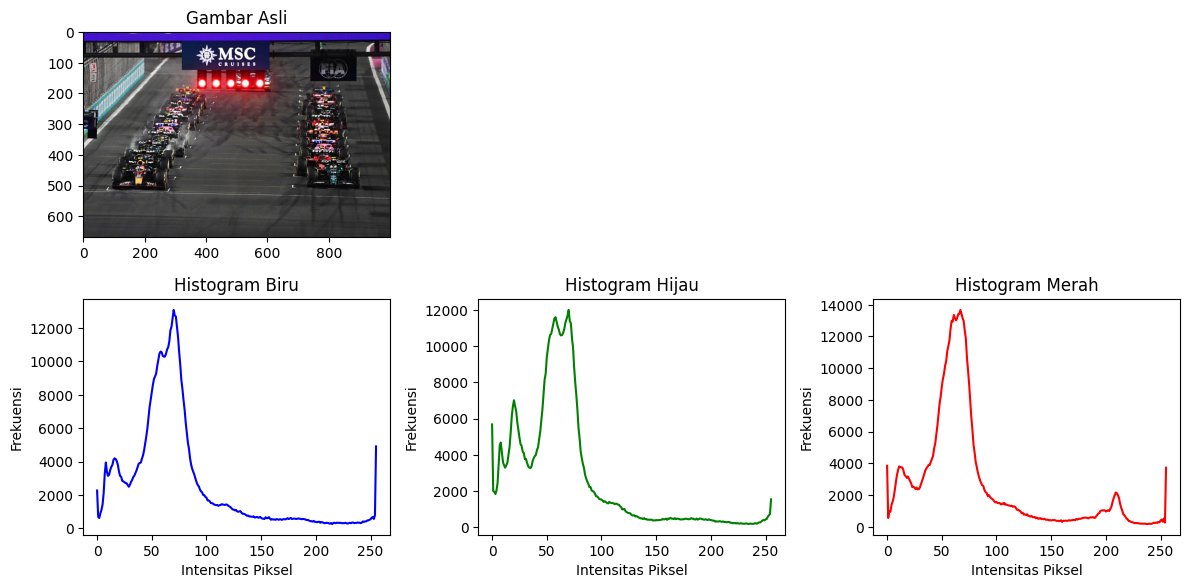

In [21]:
# Tulis kode Anda disini

# Hitung histogram untuk masing-masing channel warna (BGR)
hist_b = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Tampilkan histogram
plt.subplot(234)
plt.title('Histogram Biru')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.plot(hist_b, color='blue')

plt.subplot(235)
plt.title('Histogram Hijau')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.plot(hist_g, color='green')

plt.subplot(236)
plt.title('Histogram Merah')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.plot(hist_r, color='red')

plt.tight_layout()
plt.show()

4. Implementasikan metode Histogram Oriented Gradients (HOG) untuk feature descriptor pada image tersebut! Tampilkan jumlah feature setelah proses HOG tersebut dilakukan!

Jumlah fitur HOG: 807003


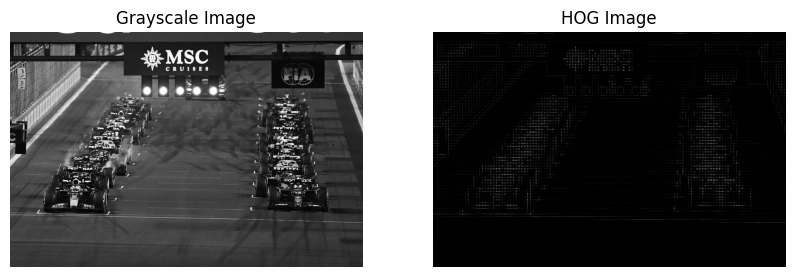

In [22]:
# Tulis kode Anda disini

# Ubah gambar ke grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Hitung HOG features
features, hog_image = skimage.feature.hog(image_gray, visualize=True)

# Tampilkan jumlah fitur HOG
print("Jumlah fitur HOG:", len(features))

# Tampilkan gambar hasil HOG
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')
axes[1].imshow(hog_image, cmap='gray')
axes[1].set_title('HOG Image')
axes[1].axis('off')
plt.show()


5. Terapkan Otsu's thresholding pada image tersebut! Tampilkan nilai thresholding terbaik yang dihasilkan oleh metode Otsu! Tampilkan pula image sebelum dan setelah disegmentasi menggunakan Otsu's thresholding!

Nilai Threshold Otsu terbaik: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


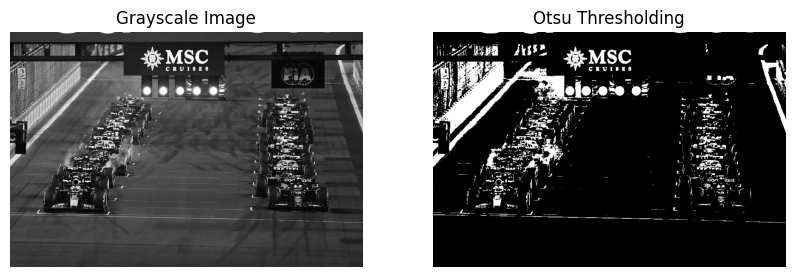

In [23]:
# Tulis kode Anda disini

# Ubah gambar ke grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menggunakan metode Otsu untuk thresholding
_, otsu_threshold = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan nilai thresholding terbaik
print("Nilai Threshold Otsu terbaik:", otsu_threshold)

# Tampilkan gambar asli dan hasil setelah thresholding Otsu
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')
axes[1].imshow(otsu_threshold, cmap='gray')
axes[1].set_title('Otsu Thresholding')
axes[1].axis('off')
plt.show()

6. Terapkan Adaptive Thresholding pada image tersebut! Tampilkan hasilnya!

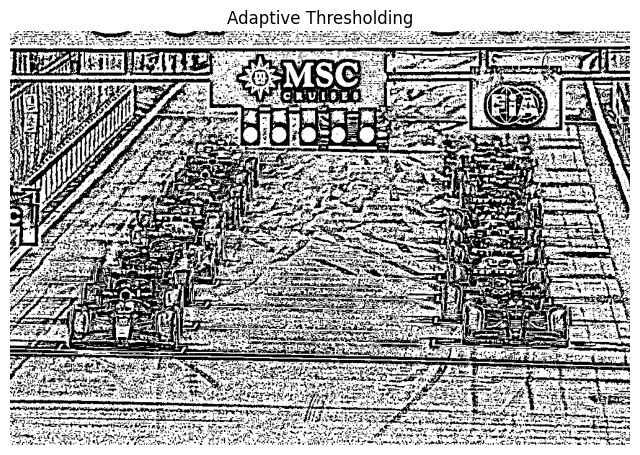

In [24]:
# Tulis kode Anda disini

# Ubah gambar ke grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Terapkan Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Tampilkan gambar hasil Adaptive Thresholding
plt.figure(figsize=(8, 8))
plt.imshow(adaptive_threshold, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()

7. Lakukan segmentasi citra menggunakan metode K-Means Clustering! Gunakan K=3, dan tampilkan hasilnya!

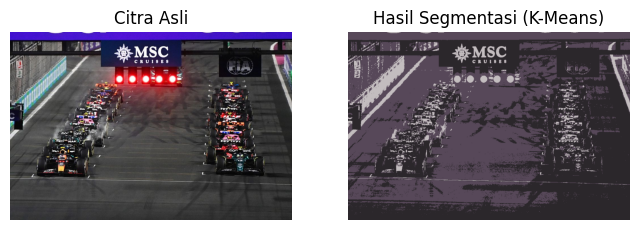

In [25]:
# Tulis kode Anda disini

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mengubah citra menjadi array 2D (tinggi x lebar, RGB) untuk dianalisis
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Mengonversi ke float32

# Menjalankan algoritma K-Means Clustering
k = 3  # Jumlah cluster
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi tipe data kembali ke uint8
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(image.shape)

# Tampilkan hasil segmentasi
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(image)
plt.title('Citra Asli')
plt.axis('off')
plt.subplot(122)
plt.imshow(segmented_image)
plt.title('Hasil Segmentasi (K-Means)')
plt.axis('off')
plt.show()